<a href="https://colab.research.google.com/github/Baharkucukozer/Screen-Time-and-Health-Analysis/blob/main/DSA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns in the dataset: Index(['Date', 'ENTERTAINMENT', 'PRODUCTIVITY', 'TOTAL', 'Step Count'], dtype='object')
Renaming 'Step Count' to 'step_count'


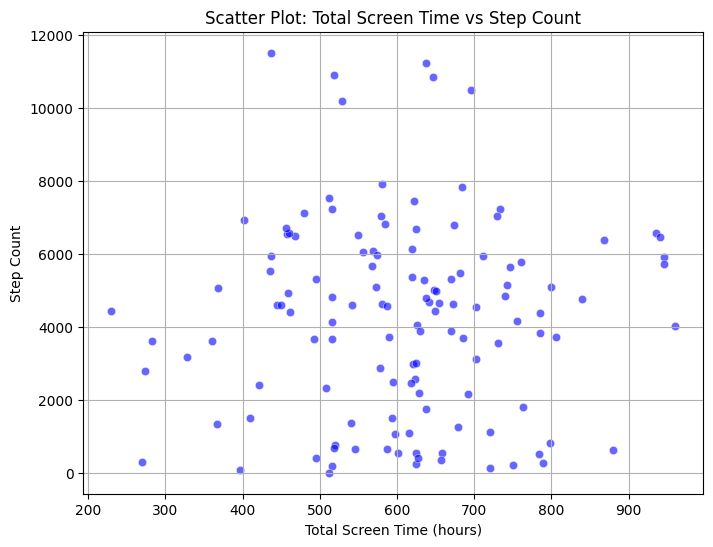

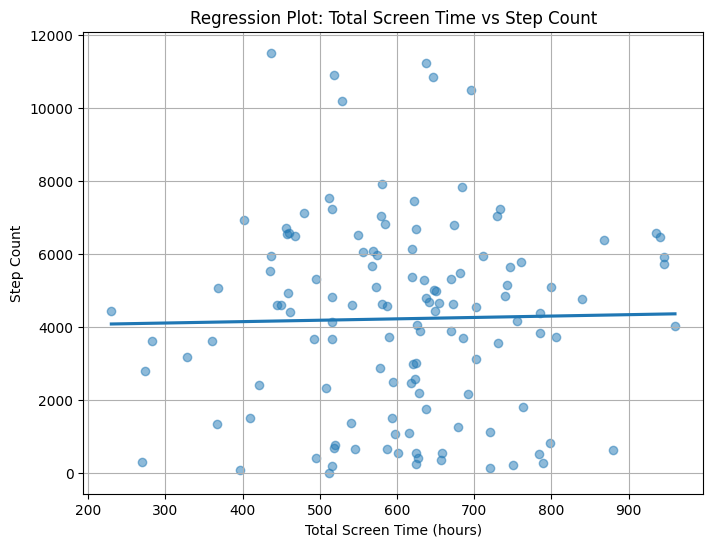

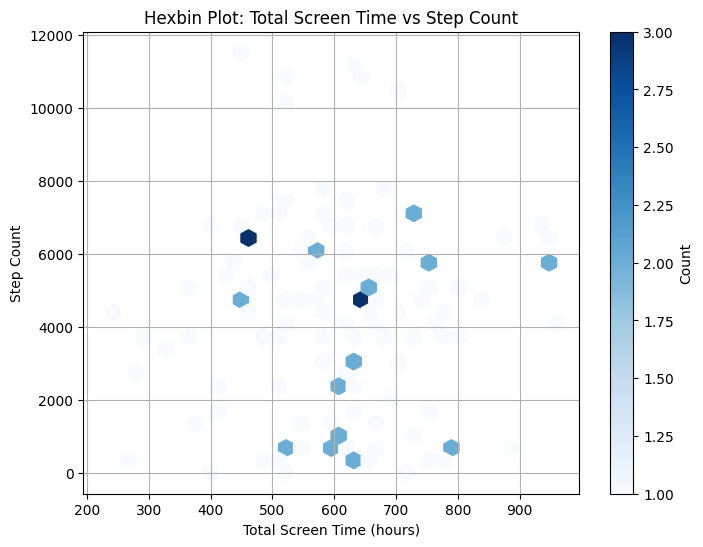

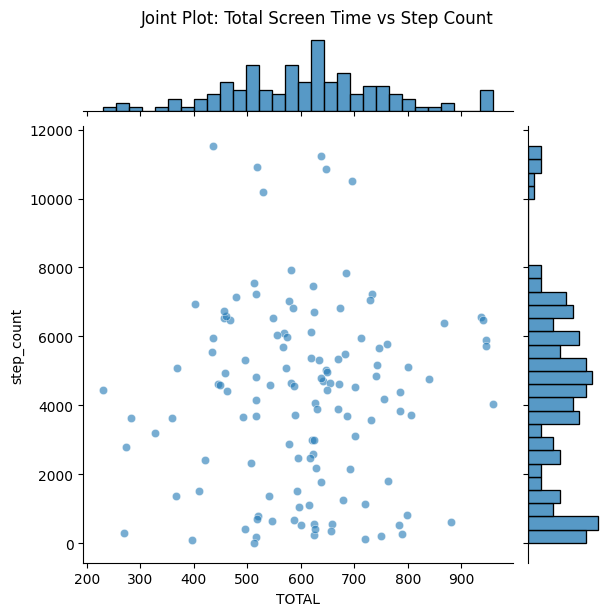

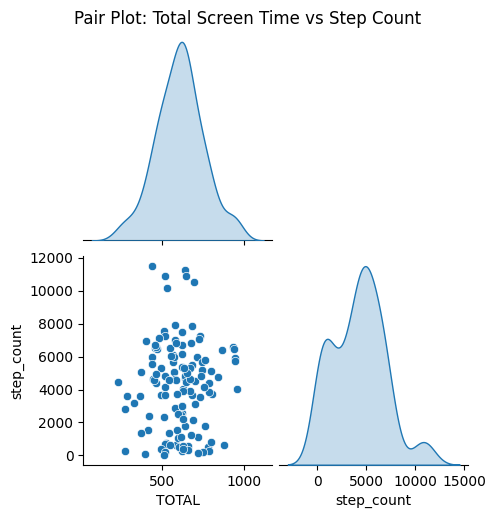

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('DSA_updated.xlsx')

# Check the columns in the dataset
print("Columns in the dataset:", data.columns)

# Ensure the date column is named correctly
if 'Date' not in data.columns:
    print("The 'date' column is not found. Available columns:", data.columns)
    # If necessary, rename or adjust here
    # Uncomment and modify the following line if needed:
    # data.rename(columns={'old_date_column_name': 'date'}, inplace=True)

# Ensure the date column is datetime if it exists
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
else:
    print("No 'date' column to convert to datetime.")

# Check if 'step_count' column exists, if not, try 'Step_count'
if 'step_count' not in data.columns:
    if 'Step Count' in data.columns:
        print("Renaming 'Step Count' to 'step_count'")
        data.rename(columns={'Step Count': 'step_count'}, inplace=True)
    else:
        raise ValueError("Neither 'step_count' nor 'Step_count' found in the dataset. Please check your data.")

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='TOTAL', y='step_count', alpha=0.6, color='blue')
plt.title('Scatter Plot: Total Screen Time vs Step Count')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Step Count')
plt.grid(True)
plt.show()

# Line Fit Plot (Regression)
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='TOTAL', y='step_count', ci=None, scatter_kws={'alpha': 0.5})
plt.title('Regression Plot: Total Screen Time vs Step Count')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Step Count')
plt.grid(True)
plt.show()

# Hexbin Plot
plt.figure(figsize=(8, 6))
plt.hexbin(data['TOTAL'], data['step_count'], gridsize=30, cmap='Blues', mincnt=1)
cb = plt.colorbar(label='Count')
plt.title('Hexbin Plot: Total Screen Time vs Step Count')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Step Count')
plt.grid(True)
plt.show()

# Joint Plot
sns.jointplot(data=data, x='TOTAL', y='step_count', kind='scatter', alpha=0.6, marginal_kws={'bins': 30})
plt.suptitle('Joint Plot: Total Screen Time vs Step Count', y=1.02)
plt.show()

# Pair Plot
selected_columns = ['TOTAL', 'step_count']
sns.pairplot(data[selected_columns], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot: Total Screen Time vs Step Count', y=1.02)
plt.show()

Columns in the dataset: Index(['Date', 'ENTERTAINMENT', 'PRODUCTIVITY', 'TOTAL', 'Step Count'], dtype='object')


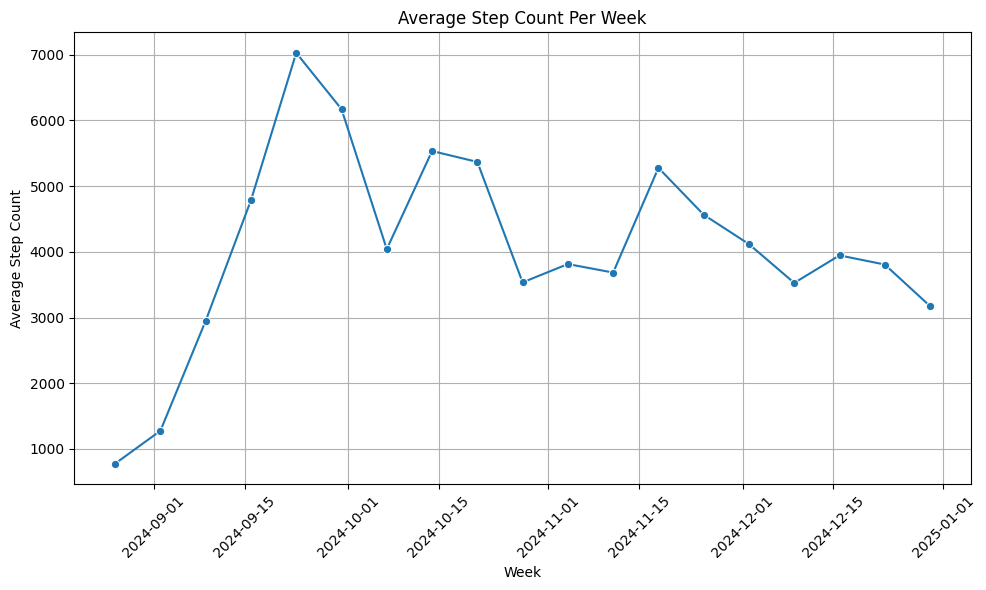

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('DSA_updated.xlsx')

# Check the columns in the dataset
print("Columns in the dataset:", data.columns)

# Verify if the 'date' column exists
if 'Date' not in data.columns:
    print("The 'Date' column is not found. Available columns:", data.columns)
    # Optional: Rename column if a likely candidate exists
    # Example: data.rename(columns={'old_date_column_name': 'date'}, inplace=True)

# Attempt to convert 'date' to datetime if it exists
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
else:
    print("Skipping date conversion as 'Date' column is missing.")

# Calculate average step count per week if 'date' and 'step_count' exist
if 'Date' in data.columns and 'Step Count' in data.columns:
    data['week'] = data['Date'].dt.to_period('W').dt.start_time
    weekly_avg_steps = data.groupby('week')['Step Count'].mean().reset_index()

    # Plot the weekly average step count
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=weekly_avg_steps, x='week', y='Step Count', marker='o')
    plt.title('Average Step Count Per Week')
    plt.xlabel('Week')
    plt.ylabel('Average Step Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("'date' or 'step_count' column is missing. Unable to calculate weekly averages.")


Columns in the dataset: Index(['Date', 'ENTERTAINMENT', 'PRODUCTIVITY', 'TOTAL', 'Step Count'], dtype='object')


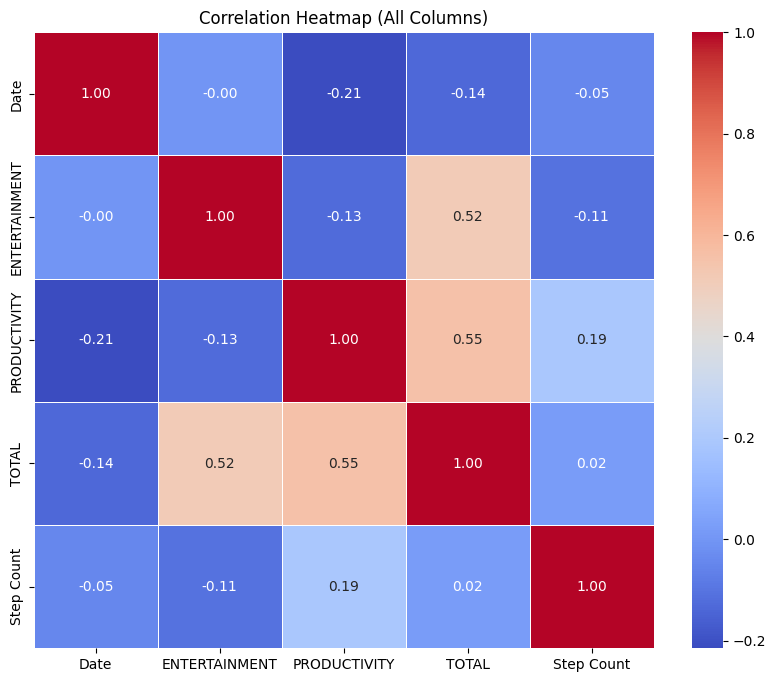

The necessary columns ('TOTAL', 'entertainment', and 'productivity') are missing in the dataset.


In [3]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('DSA_updated.xlsx')

# Check the columns in the dataset
print("Columns in the dataset:", data.columns)

# Remove rows with missing values
data = data.dropna()

# Heatmap of correlations for all columns
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (All Columns)')
plt.show()

# Ensure specific columns for scatter plot and regression
if 'TOTAL' in data.columns and 'ENTERTAINMENT' in data.columns and 'productivity' in data.columns:
    # Visualization for TOTAL vs Entertainment
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='TOTAL', y='ENTERTAINMENT', alpha=0.6, color='blue')
    sns.regplot(data=data, x='TOTAL', y='ENTERTAINMENT', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title('Scatter Plot with Regression Line: Total Screen Time vs Entertainment Screen Time')
    plt.xlabel('Total Screen Time (hours)')
    plt.ylabel('Entertainment Screen Time (hours)')
    plt.grid(True)
    plt.show()

    # Visualization for TOTAL vs Productivity
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='TOTAL', y='PRODUCTIVITY', alpha=0.6, color='green')
    sns.regplot(data=data, x='TOTAL', y='productivity', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title('Scatter Plot with Regression Line: Total Screen Time vs Productivity Screen Time')
    plt.xlabel('Total Screen Time (hours)')
    plt.ylabel('Productivity Screen Time (hours)')
    plt.grid(True)
    plt.show()

    # Dual bar chart for Entertainment and Productivity
    avg_entertainment = data['ENTERTAINMENT'].mean()
    avg_productivity = data['PRODUCTIVITY'].mean()

    labels = ['ENTERTAINMENT', 'PRODUCTIVITY']
    values = [avg_entertainment, avg_productivity]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['blue', 'green'], alpha=0.7)
    plt.title('Average Screen Time: Entertainment vs Productivity')
    plt.xlabel('Category')
    plt.ylabel('Average Screen Time (hours)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

else:
    print("The necessary columns ('TOTAL', 'entertainment', and 'productivity') are missing in the dataset.")


Columns in the dataset: Index(['Date', 'ENTERTAINMENT', 'PRODUCTIVITY', 'TOTAL', 'Step Count'], dtype='object')


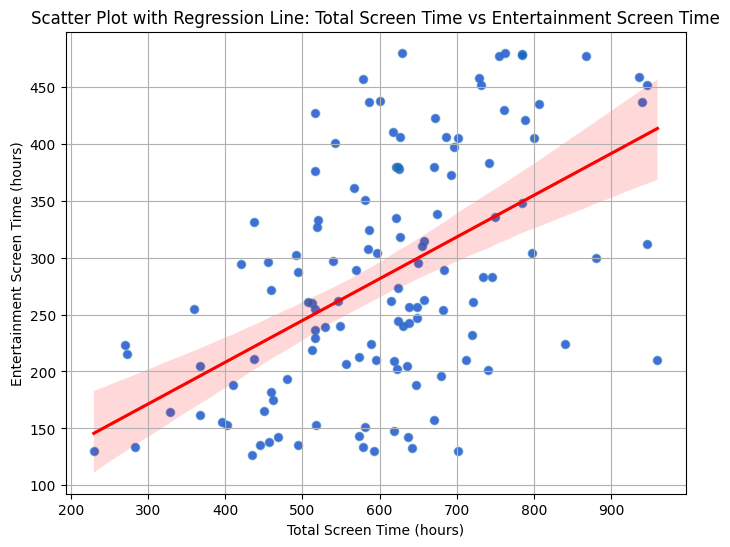

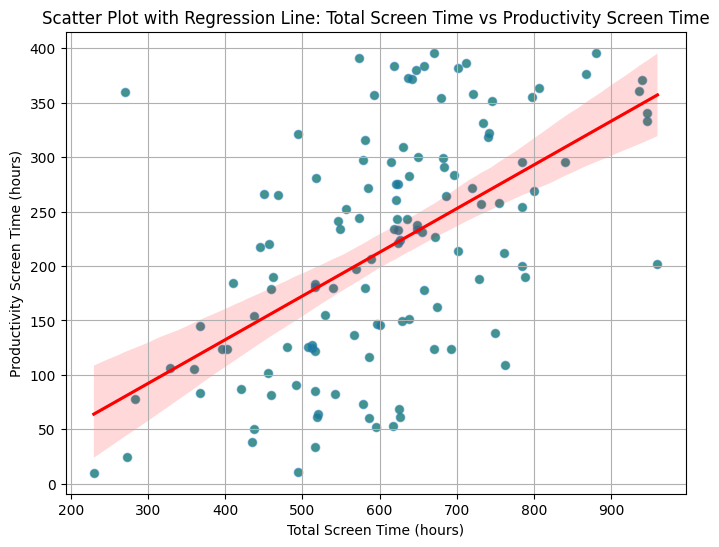

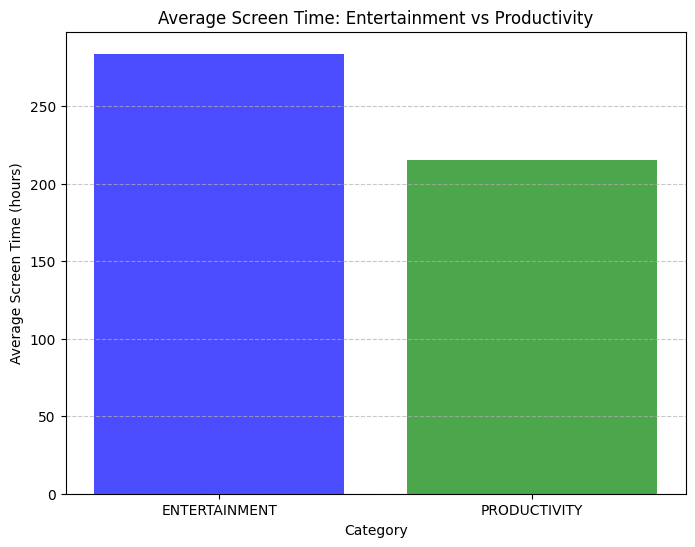

In [4]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('DSA_updated.xlsx')

# Check the columns in the dataset
print("Columns in the dataset:", data.columns)

# Remove rows with missing values
data = data.dropna()



# Ensure specific columns for scatter plot and regression
if 'TOTAL' in data.columns and 'ENTERTAINMENT' in data.columns and 'PRODUCTIVITY' in data.columns:
    # Visualization for TOTAL vs Entertainment
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='TOTAL', y='ENTERTAINMENT', alpha=0.6, color='blue')
    sns.regplot(data=data, x='TOTAL', y='ENTERTAINMENT', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title('Scatter Plot with Regression Line: Total Screen Time vs Entertainment Screen Time')
    plt.xlabel('Total Screen Time (hours)')
    plt.ylabel('Entertainment Screen Time (hours)')
    plt.grid(True)
    plt.show()

    # Visualization for TOTAL vs Productivity
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='TOTAL', y='PRODUCTIVITY', alpha=0.6, color='green')
    sns.regplot(data=data, x='TOTAL', y='PRODUCTIVITY', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title('Scatter Plot with Regression Line: Total Screen Time vs Productivity Screen Time')
    plt.xlabel('Total Screen Time (hours)')
    plt.ylabel('Productivity Screen Time (hours)')
    plt.grid(True)
    plt.show()

    # Dual bar chart for Entertainment and Productivity
    avg_entertainment = data['ENTERTAINMENT'].mean()
    avg_productivity = data['PRODUCTIVITY'].mean()

    labels = ['ENTERTAINMENT', 'PRODUCTIVITY']
    values = [avg_entertainment, avg_productivity]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['blue', 'green'], alpha=0.7)
    plt.title('Average Screen Time: Entertainment vs Productivity')
    plt.xlabel('Category')
    plt.ylabel('Average Screen Time (hours)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

else:
    print("The necessary columns ('TOTAL', 'entertainment', and 'productivity') are missing in the dataset.")


Columns in the dataset: Index(['Date', 'ENTERTAINMENT', 'PRODUCTIVITY', 'TOTAL', 'Step Count'], dtype='object')
Pearson Correlation Coefficient (Total vs Entertainment): 0.06
P-value (Total vs Entertainment): 0.7930
Pearson Correlation Coefficient (Total vs Productivity): 0.59
P-value (Total vs Productivity): 0.0079


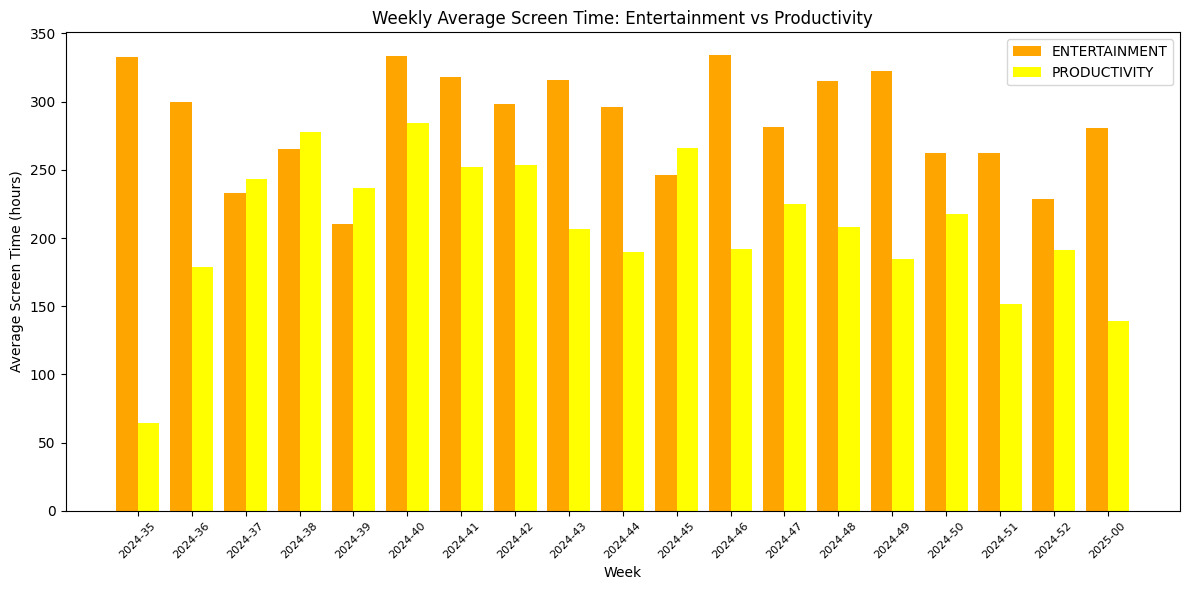

In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('DSA_updated.xlsx')

# Check the columns in the dataset
print("Columns in the dataset:", data.columns)

# Remove rows with missing values
data = data.dropna()

# Calculate weekly averages
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
weekly_data = data.resample('W').mean()

# Ensure specific columns for correlation and dual bar chart
if 'TOTAL' in weekly_data.columns and 'ENTERTAINMENT' in weekly_data.columns and 'PRODUCTIVITY' in weekly_data.columns:
    # Perform Pearson correlation tests
    correlation_total_entertainment, p_value_total_entertainment = stats.pearsonr(weekly_data['TOTAL'], weekly_data['ENTERTAINMENT'])
    correlation_total_productivity, p_value_total_productivity = stats.pearsonr(weekly_data['TOTAL'], weekly_data['PRODUCTIVITY'])

    print(f"Pearson Correlation Coefficient (Total vs Entertainment): {correlation_total_entertainment:.2f}")
    print(f"P-value (Total vs Entertainment): {p_value_total_entertainment:.4f}")

    print(f"Pearson Correlation Coefficient (Total vs Productivity): {correlation_total_productivity:.2f}")
    print(f"P-value (Total vs Productivity): {p_value_total_productivity:.4f}")

    # Dual bar chart for weekly averages of Entertainment and Productivity
    labels = weekly_data.index.strftime('%Y-%W')
    entertainment_weekly_avg = weekly_data['ENTERTAINMENT']
    productivity_weekly_avg = weekly_data['PRODUCTIVITY']

    x = range(len(labels))

    plt.figure(figsize=(12, 6))
    plt.bar(x, entertainment_weekly_avg, width=0.4, label='ENTERTAINMENT', color='orange', align='center')
    plt.bar([p + 0.4 for p in x], productivity_weekly_avg, width=0.4, label='PRODUCTIVITY', color='yellow', align='center')

    plt.xticks(ticks=[p + 0.2 for p in x], labels=labels, rotation=45, fontsize=8)
    plt.xlabel('Week', fontsize=10)
    plt.ylabel('Average Screen Time (hours)', fontsize=10)
    plt.title('Weekly Average Screen Time: Entertainment vs Productivity', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("The necessary columns ('TOTAL', 'entertainment', and 'productivity') are missing in the dataset.")


Entertainment (hrs): 11.30
Productivity (hrs): 8.54
Step Count (hrs): 2.72
Other (hrs): 1.44


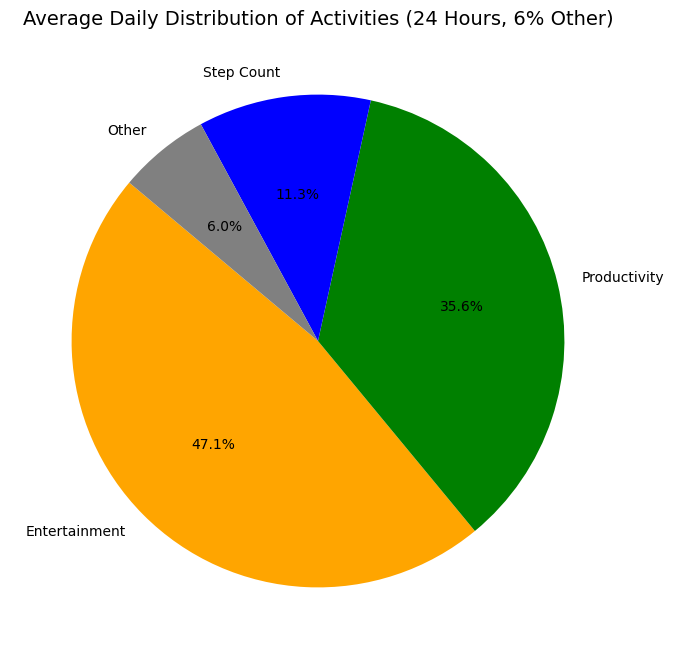

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('DSA_updated.xlsx')

# Check if the necessary columns exist
if 'ENTERTAINMENT' in data.columns and 'PRODUCTIVITY' in data.columns and 'Step Count' in data.columns:
    # Calculate average values
    avg_entertainment = data['ENTERTAINMENT'].mean()
    avg_productivity = data['PRODUCTIVITY'].mean()
    avg_step_count = (data['Step Count'].mean() * 7 * 200) / (24 * 60 * 60)  # Convert steps to hours

    # Total activity time excluding 'OTHER'
    total_activity_time = avg_entertainment + avg_productivity + avg_step_count

    # Adjust for 'OTHER' being 6% of the day (24 hours)
    day_length = 24
    other_time = day_length * 0.06  # 6% of 24 hours
    scale_factor = (day_length - other_time) / total_activity_time  # Scale the remaining activities to fit 94%

    # Scale the activities
    avg_entertainment *= scale_factor
    avg_productivity *= scale_factor
    avg_step_count *= scale_factor

    # Print the calculated values for verification
    print(f"Entertainment (hrs): {avg_entertainment:.2f}")
    print(f"Productivity (hrs): {avg_productivity:.2f}")
    print(f"Step Count (hrs): {avg_step_count:.2f}")
    print(f"Other (hrs): {other_time:.2f}")

    # Labels and values for the pie chart
    labels = ['Entertainment', 'Productivity', 'Step Count', 'Other']
    values = [avg_entertainment, avg_productivity, avg_step_count, other_time]

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['orange', 'green', 'blue', 'gray'])
    plt.title('Average Daily Distribution of Activities (24 Hours, 6% Other)', fontsize=14)
    plt.show()

else:
    print("The necessary columns ('entertainment', 'productivity', and 'step count') are missing in the dataset.")